In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def visualize(path, name):
    df = pd.read_csv(path, sep='\t', header=None)
    print(df[:][20:25])
    df = df[0][22:].str.split(',', expand=True)
    for i in range(8):
        df[i] = pd.to_numeric(df[i], errors='coerce')
        
    fig, ax = plt.subplots(1, 2, figsize = (16, 7))
    ax[0].plot(df[0].values, df[1].values, label = 'x')
    ax[0].plot(df[0].values, df[2].values, label = 'y')
    ax[0].plot(df[0].values, df[3].values, label = 'alpha')
    ax[1].plot(df[0].values, df[4].values, label = 'Instant cost')
    ax[1].plot(df[0].values, df[5].values, label = 'Total cost')
    fig.suptitle(name, fontsize = 22)
    ax[0].set_xlabel("time", fontsize = 12)
    ax[1].set_xlabel("time", fontsize = 12)
    ax[0].set_ylabel("coordinates", fontsize = 12)
    ax[1].set_ylabel("cost", fontsize = 12)
    ax[0].grid()
    ax[1].grid()
    ax[0].legend(fontsize = 12)
    ax[1].legend(fontsize = 12)
    fig.show()

In [14]:
# csv_file = "./simdata/ROS__3wrobotNI__MPC__2022-06-06__17:35:58__run01.csv"

# temp_lines = csv_file.readline() + '\n' + csv_file.readline()
# dialect = csv.Sniffer().sniff(temp_lines, delimiters=';,')

# # remember to go back to the start of the file for the next time it's read
# csv_file.seek(0) 

# df = pd.read_csv(csv_file, sep=dialect.delimiter)
# "ROS__3wrobotNI__SQL__2022-06-06__17:39:28__run01.csv"
MPC_conv = pd.read_csv(
    "./simdata/ROS__3wrobotNI__MPC__2022-06-06__17:35:58__run01.csv", 
    sep='\t', header=None)
    #on_bad_lines='skip')
MPC_conv.head(30)

/tmp/ipykernel_24746/4042256129.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  MPC_conv = pd.read_csv(


,0
0,"System,3wrobotNI"
1,"Controller,MPC"
2,"dt,0.05"
3,"state_init,[3. 3. 3.14159265]"
4,"is_est_model,False"
5,"model_est_stage,2.0"
6,"model_est_period_multiplier,1"
7,"model_order,5"
8,"prob_noise_pow,8"
9,"Nactor,3"


                                                    0
20  t [s],x [m],y [m],alpha [rad],stage_obj,accum_...
21                0.0,0.0,0.0,0.0,0.0,0.0,-0.022,-0.2
22  0.09999999999999432,3.0000282944051455,2.99994...
23  0.20399999999999352,3.0000282977516717,2.99994...
24  0.29999999999999716,3.0000282977516717,2.99994...


/tmp/ipykernel_24746/2869385254.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


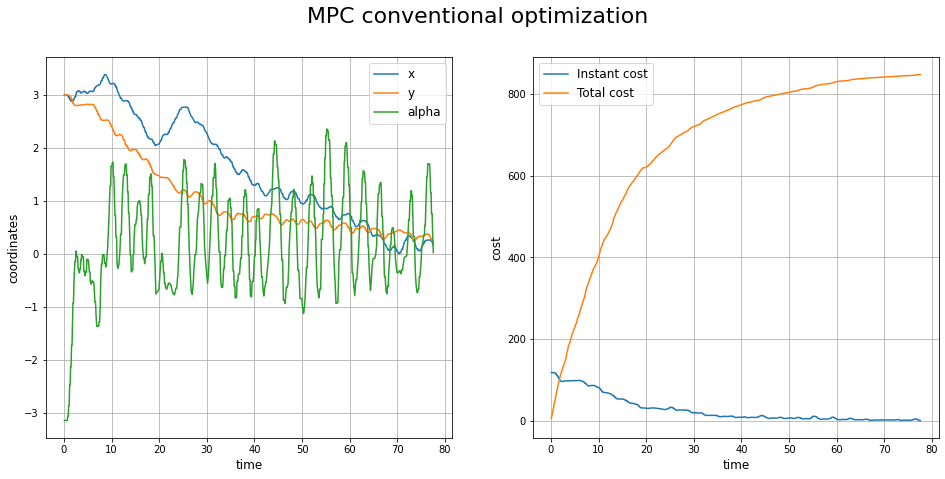

In [71]:
visualize("./simdata/ROS__3wrobotNI__MPC__2022-06-06__17:35:58__run01.csv", f"MPC conventional optimization")

                                                    0
20  t [s],x [m],y [m],alpha [rad],stage_obj,accum_...
21                0.0,0.0,0.0,0.0,0.0,0.0,-0.022,-0.2
22  0.09999999999999432,2.9772449450764866,2.99911...
23  0.20199999999999818,2.9772449450764866,2.99911...
24  0.30000000000001137,2.97724104913338,2.9991179...


/tmp/ipykernel_24746/2869385254.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


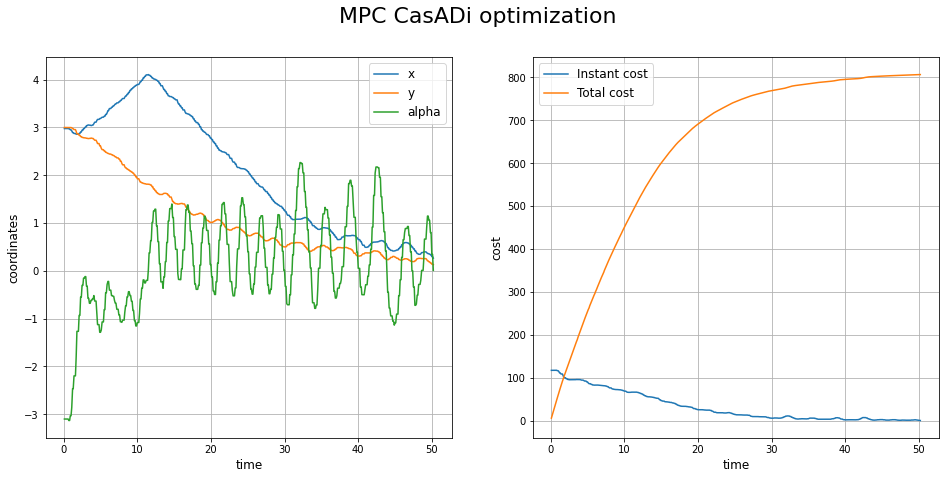

In [73]:
visualize("./simdata/ROS__3wrobotNI__MPC__2022-06-06__19:04:04__run01.csv", "MPC CasADi optimization")

                                                    0
20  t [s],x [m],y [m],alpha [rad],stage_obj,accum_...
21                0.0,0.0,0.0,0.0,0.0,0.0,-0.022,-0.2
22  0.10099999999999909,3.0000201128739965,2.99999...
23  0.1999999999999993,3.000020116087736,2.9999949...
24  0.31099999999999994,3.0002153357113266,2.99999...


/tmp/ipykernel_24746/2869385254.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


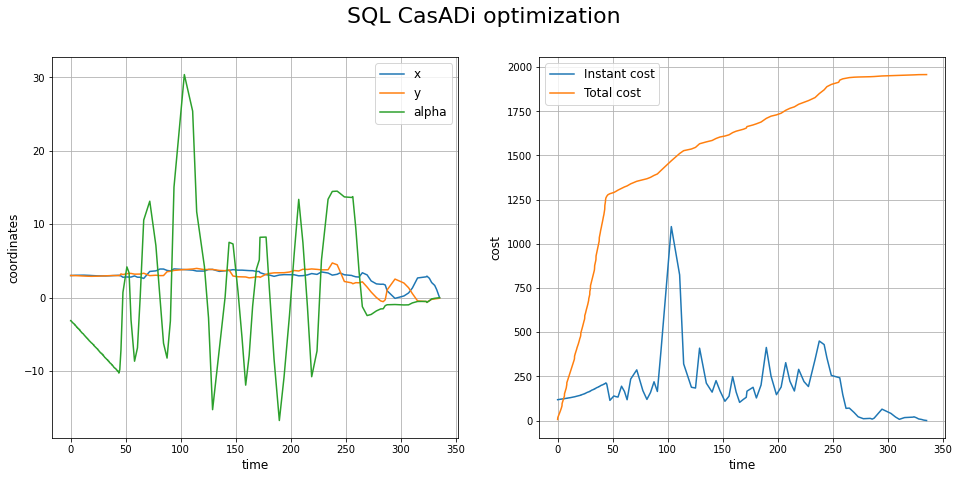

In [74]:
visualize("./simdata/ROS__3wrobotNI__SQL__2022-06-06__19:11:22__run01.csv", "SQL CasADi optimization")

                                                    0
20  t [s],x [m],y [m],alpha [rad],stage_obj,accum_...
21                0.0,0.0,0.0,0.0,0.0,0.0,-0.022,-0.2
22  0.10000000000002274,2.9990510699278206,2.99998...
23  0.19999999999998863,2.999049267794645,2.999980...
24  0.30000000000001137,2.9990456082095904,2.99998...


/tmp/ipykernel_24746/2869385254.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


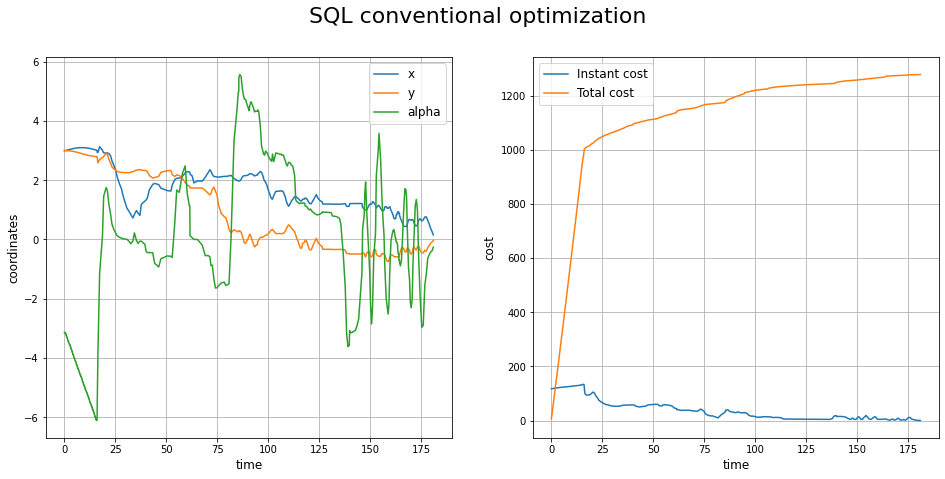

In [75]:
visualize("./simdata/ROS__3wrobotNI__SQL__2022-06-06__17:39:28__run01.csv", "SQL conventional optimization")

In [26]:
MPC_conv.iloc[20].str.split(',', expand = True)

,0,1,2,3,4,5,6,7
0,t [s],x [m],y [m],alpha [rad],stage_obj,accum_obj,v [m/s],omega [rad/s]


In [36]:
df = MPC_conv[0][22:].str.split(',', expand=True)
df

,0,1,2,3,4,5,6,7
22,0.09999999999999432,3.0000282944051455,2.999946882943128,-3.140764343678468,117.86155320178682,5.893077660089341,0.000782716028107317,0.024898620694877957
23,0.20399999999999352,3.0000282977516717,2.9999468633367385,-3.1407640344589343,117.8615501232117,11.786155166249927,0.22,2.0
24,0.29999999999999716,3.0000282977516717,2.9999468633367385,-3.1407640344589343,117.8615501232117,17.679232672410514,0.22,2.0
25,0.3999999999999915,3.0000283108426347,2.9999467866407254,-3.1407628248578936,117.8615380804841,23.57230957643472,0.21999999996861466,1.9999999997378488
26,0.5,3.0000283108426347,2.9999467866407254,-3.1407628248578936,117.8615380804841,29.465386480458925,0.22,2.0
...,...,...,...,...,...,...,...,...
631,77.07000000000001,0.25618985710712083,0.2932736438104052,1.1587388679341144,2.3340365513686914,847.778662102967,-0.22,-2.0
632,77.17299999999999,0.2330637679929004,0.26049169640961367,0.75920231810227,1.3635848386975407,847.8468413449019,-0.22,-2.0
633,77.29699999999998,0.2330637679929004,0.26049169640961367,0.75920231810227,1.3635848386975407,847.9150205868368,-0.2199999999999994,-1.9999999999999998
634,77.391,0.20516265146447088,0.24181654975518818,0.4256557722142409,0.8501187008861995,847.9575265218812,-0.2199999999999994,-1.9999999999999998


In [42]:
for i in range(8):
    df[i] = pd.to_numeric(df[i], errors='coerce')
df = df.append(
    {0: 77.612, 1:0.06, 2:0.1, 3:0.01, 4:0.34, 5:847.99, 6:-0.22, 7:-1.24},
    ignore_index=True)

df

/tmp/ipykernel_24746/3593330510.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


,0,1,2,3,4,5,6,7
0,0.100,3.000028,2.999947,-3.140764,117.861553,5.893078,0.000783,0.024899
1,0.204,3.000028,2.999947,-3.140764,117.861550,11.786155,0.220000,2.000000
2,0.300,3.000028,2.999947,-3.140764,117.861550,17.679233,0.220000,2.000000
3,0.400,3.000028,2.999947,-3.140763,117.861538,23.572310,0.220000,2.000000
4,0.500,3.000028,2.999947,-3.140763,117.861538,29.465386,0.220000,2.000000
...,...,...,...,...,...,...,...,...
610,77.173,0.233064,0.260492,0.759202,1.363585,847.846841,-0.220000,-2.000000
611,77.297,0.233064,0.260492,0.759202,1.363585,847.915021,-0.220000,-2.000000
612,77.391,0.205163,0.241817,0.425656,0.850119,847.957527,-0.220000,-2.000000
613,77.546,0.166068,0.232422,0.026314,0.596048,847.987329,-0.220000,-1.242609


/tmp/ipykernel_24746/610145471.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


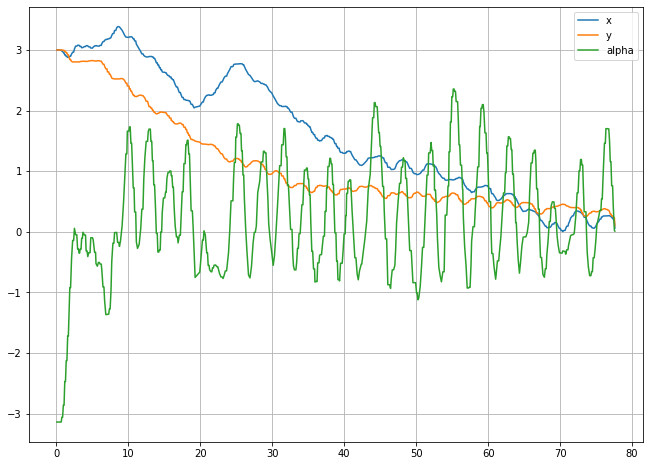

In [44]:
fig, ax = plt.subplots(1, 1, figsize = (11, 8))
ax.plot(df[0].values, df[1].values, label = 'x')
ax.plot(df[0].values, df[2].values, label = 'y')
ax.plot(df[0].values, df[3].values, label = 'alpha')
ax.set_title()
ax.grid()
ax.legend()
fig.show()